In [1]:
#https://github.com/shaoshanglqy/shap-shapley

import numpy as np
import pandas as pd
#!pip install datarobot
import datarobot as dr

from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt
import seaborn as sns # for correlation heatmap
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier


# Full DataSet
Exploratory anaysis, Outlier Detection, Missing Value Handling and feature Selection has been done on a separate Script

In [2]:
df=pd.read_csv('23_march_Pilot_data.csv')
X_train=df.drop(columns='JB_category')

y_train= df['JB_category']
y_train= pd.get_dummies(y_train)
# y_train.drop(['HEALTHY'], axis=1, inplace=True)
# y_train.rename(columns={'UNHEALTHY': 'Diagnosis'}, inplace=True)

# X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns != 'JB_category'],\
#                                                     df['JB_category'], stratify=df['JB_category'],\
#                                                     test_size = 0.3, random_state=66)
X_train.describe()


,ALT,LDH,CK,CK MB,ALDO,LACTA,CO2,NA/K
count,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000
mean,4.997014,892.158494,3813.056676,7586.811581,90.022738,3.918440,7.143785,103.793066
std,6.202310,831.417002,5527.705460,9607.333342,116.208705,2.226065,2.972533,63.970210
min,0.100000,1.400000,4.800000,20.000000,-4.400000,0.300000,0.200000,14.813312
25%,1.800000,365.975000,872.325000,2021.725000,19.350000,2.700000,5.500000,68.647290
50%,2.953299,527.300000,1951.400000,4404.100000,43.087273,3.335000,6.600000,90.878378
75%,5.550000,1247.400000,4620.600000,13194.225000,124.850000,4.793636,8.700000,129.759322
max,53.500000,4238.850000,48297.600000,123411.400000,771.800000,22.410000,17.800000,875.217391


In [3]:
df1=pd.read_csv('C:/Users/Shahadate/salmon codes/rank8 non-filled.csv')
X_test=df1.drop(columns='JB_category')
X_test.fillna(X_train.mean(), inplace=True)


y_test= df1['JB_category']
y_test= pd.get_dummies(y_test)
# y_test.drop(['HEALTHY'], axis=1, inplace=True)
# y_test.rename(columns={'UNHEALTHY': 'Diagnosis'}, inplace=True)
                                                
X_test.describe()

,ALT,LDH,CK,CK MB,ALDO,LACTA,CO2,NA/K
count,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000
mean,5.103847,867.278982,3802.533054,7087.588216,94.122106,3.841658,7.230703,103.015573
std,6.127252,821.198635,5494.966732,9281.446590,113.840385,2.182336,2.935897,63.591346
min,0.100000,1.400000,4.800000,20.000000,-4.400000,0.300000,0.200000,14.813312
25%,1.800000,365.975000,872.325000,2021.725000,19.350000,2.700000,5.500000,68.647290
50%,3.500000,527.300000,2248.020000,5436.150000,70.200000,3.918440,7.143785,96.832631
75%,4.997014,1034.175000,4326.480000,7586.811581,90.022738,3.918440,8.700000,129.759322
max,53.500000,4238.850000,48297.600000,123411.400000,771.800000,22.410000,17.800000,875.217391


In [6]:
corr = df.corr()
corr

,ALT,LDH,CK,CK MB,ALDO,LACTA,CO2,NA/K
ALT,1.000000,0.184917,0.364465,0.398998,0.365664,0.146369,-0.151301,-0.076169
LDH,0.184917,1.000000,0.248543,0.299943,0.248308,0.287160,-0.181821,-0.327374
CK,0.364465,0.248543,1.000000,0.647281,0.650540,0.110572,-0.157326,-0.079699
CK MB,0.398998,0.299943,0.647281,1.000000,0.593081,0.211112,-0.249289,-0.190256
ALDO,0.365664,0.248308,0.650540,0.593081,1.000000,0.127798,-0.088146,-0.054713
LACTA,0.146369,0.287160,0.110572,0.211112,0.127798,1.000000,-0.209392,-0.300040
CO2,-0.151301,-0.181821,-0.157326,-0.249289,-0.088146,-0.209392,1.000000,0.121804
NA/K,-0.076169,-0.327374,-0.079699,-0.190256,-0.054713,-0.300040,0.121804,1.000000


# Let's visualize the data correlation matrix

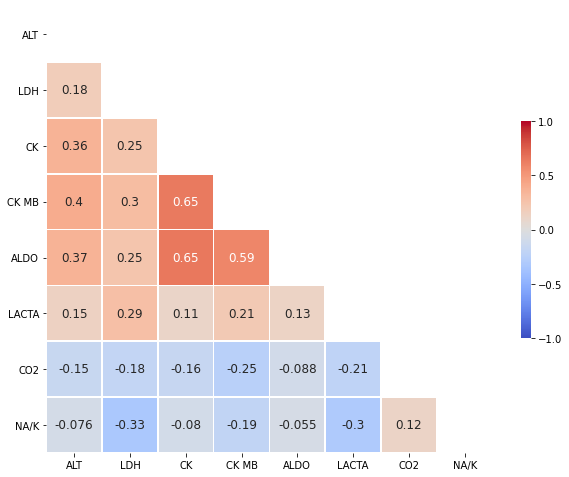

In [7]:
# Let's visualize the data correlation matrix
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(10, 10)) 
heatmap = sns.heatmap(corr, 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                "ticks" : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 12})
# Add the column names as labels
ax.set_yticklabels(corr.columns, rotation = 0)
ax.set_xticklabels(corr.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True});

 Highly correlated features can be dropped in the final pipeline

# Model Training, five-fold cross-validation

In [9]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10, random_state=0,max_depth=4, \
                            class_weight='balanced')
rf.fit(X_train, y_train)

# Make predictions for the test set
y_pred_test = rf.predict(X_test)

# Print accuracy for the training and test sets
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

Accuracy on training set: 0.989
Accuracy on test set: 0.977


In [10]:
rf.estimators_

[DecisionTreeClassifier(max_depth=4, max_features='auto', random_state=209652396),
 DecisionTreeClassifier(max_depth=4, max_features='auto', random_state=398764591),
 DecisionTreeClassifier(max_depth=4, max_features='auto', random_state=924231285),
 DecisionTreeClassifier(max_depth=4, max_features='auto',
                        random_state=1478610112),
 DecisionTreeClassifier(max_depth=4, max_features='auto', random_state=441365315),
 DecisionTreeClassifier(max_depth=4, max_features='auto',
                        random_state=1537364731),
 DecisionTreeClassifier(max_depth=4, max_features='auto', random_state=192771779),
 DecisionTreeClassifier(max_depth=4, max_features='auto',
                        random_state=1491434855),
 DecisionTreeClassifier(max_depth=4, max_features='auto',
                        random_state=1819583497),
 DecisionTreeClassifier(max_depth=4, max_features='auto', random_state=530702035)]

# Visualizing one of the tree Estimators

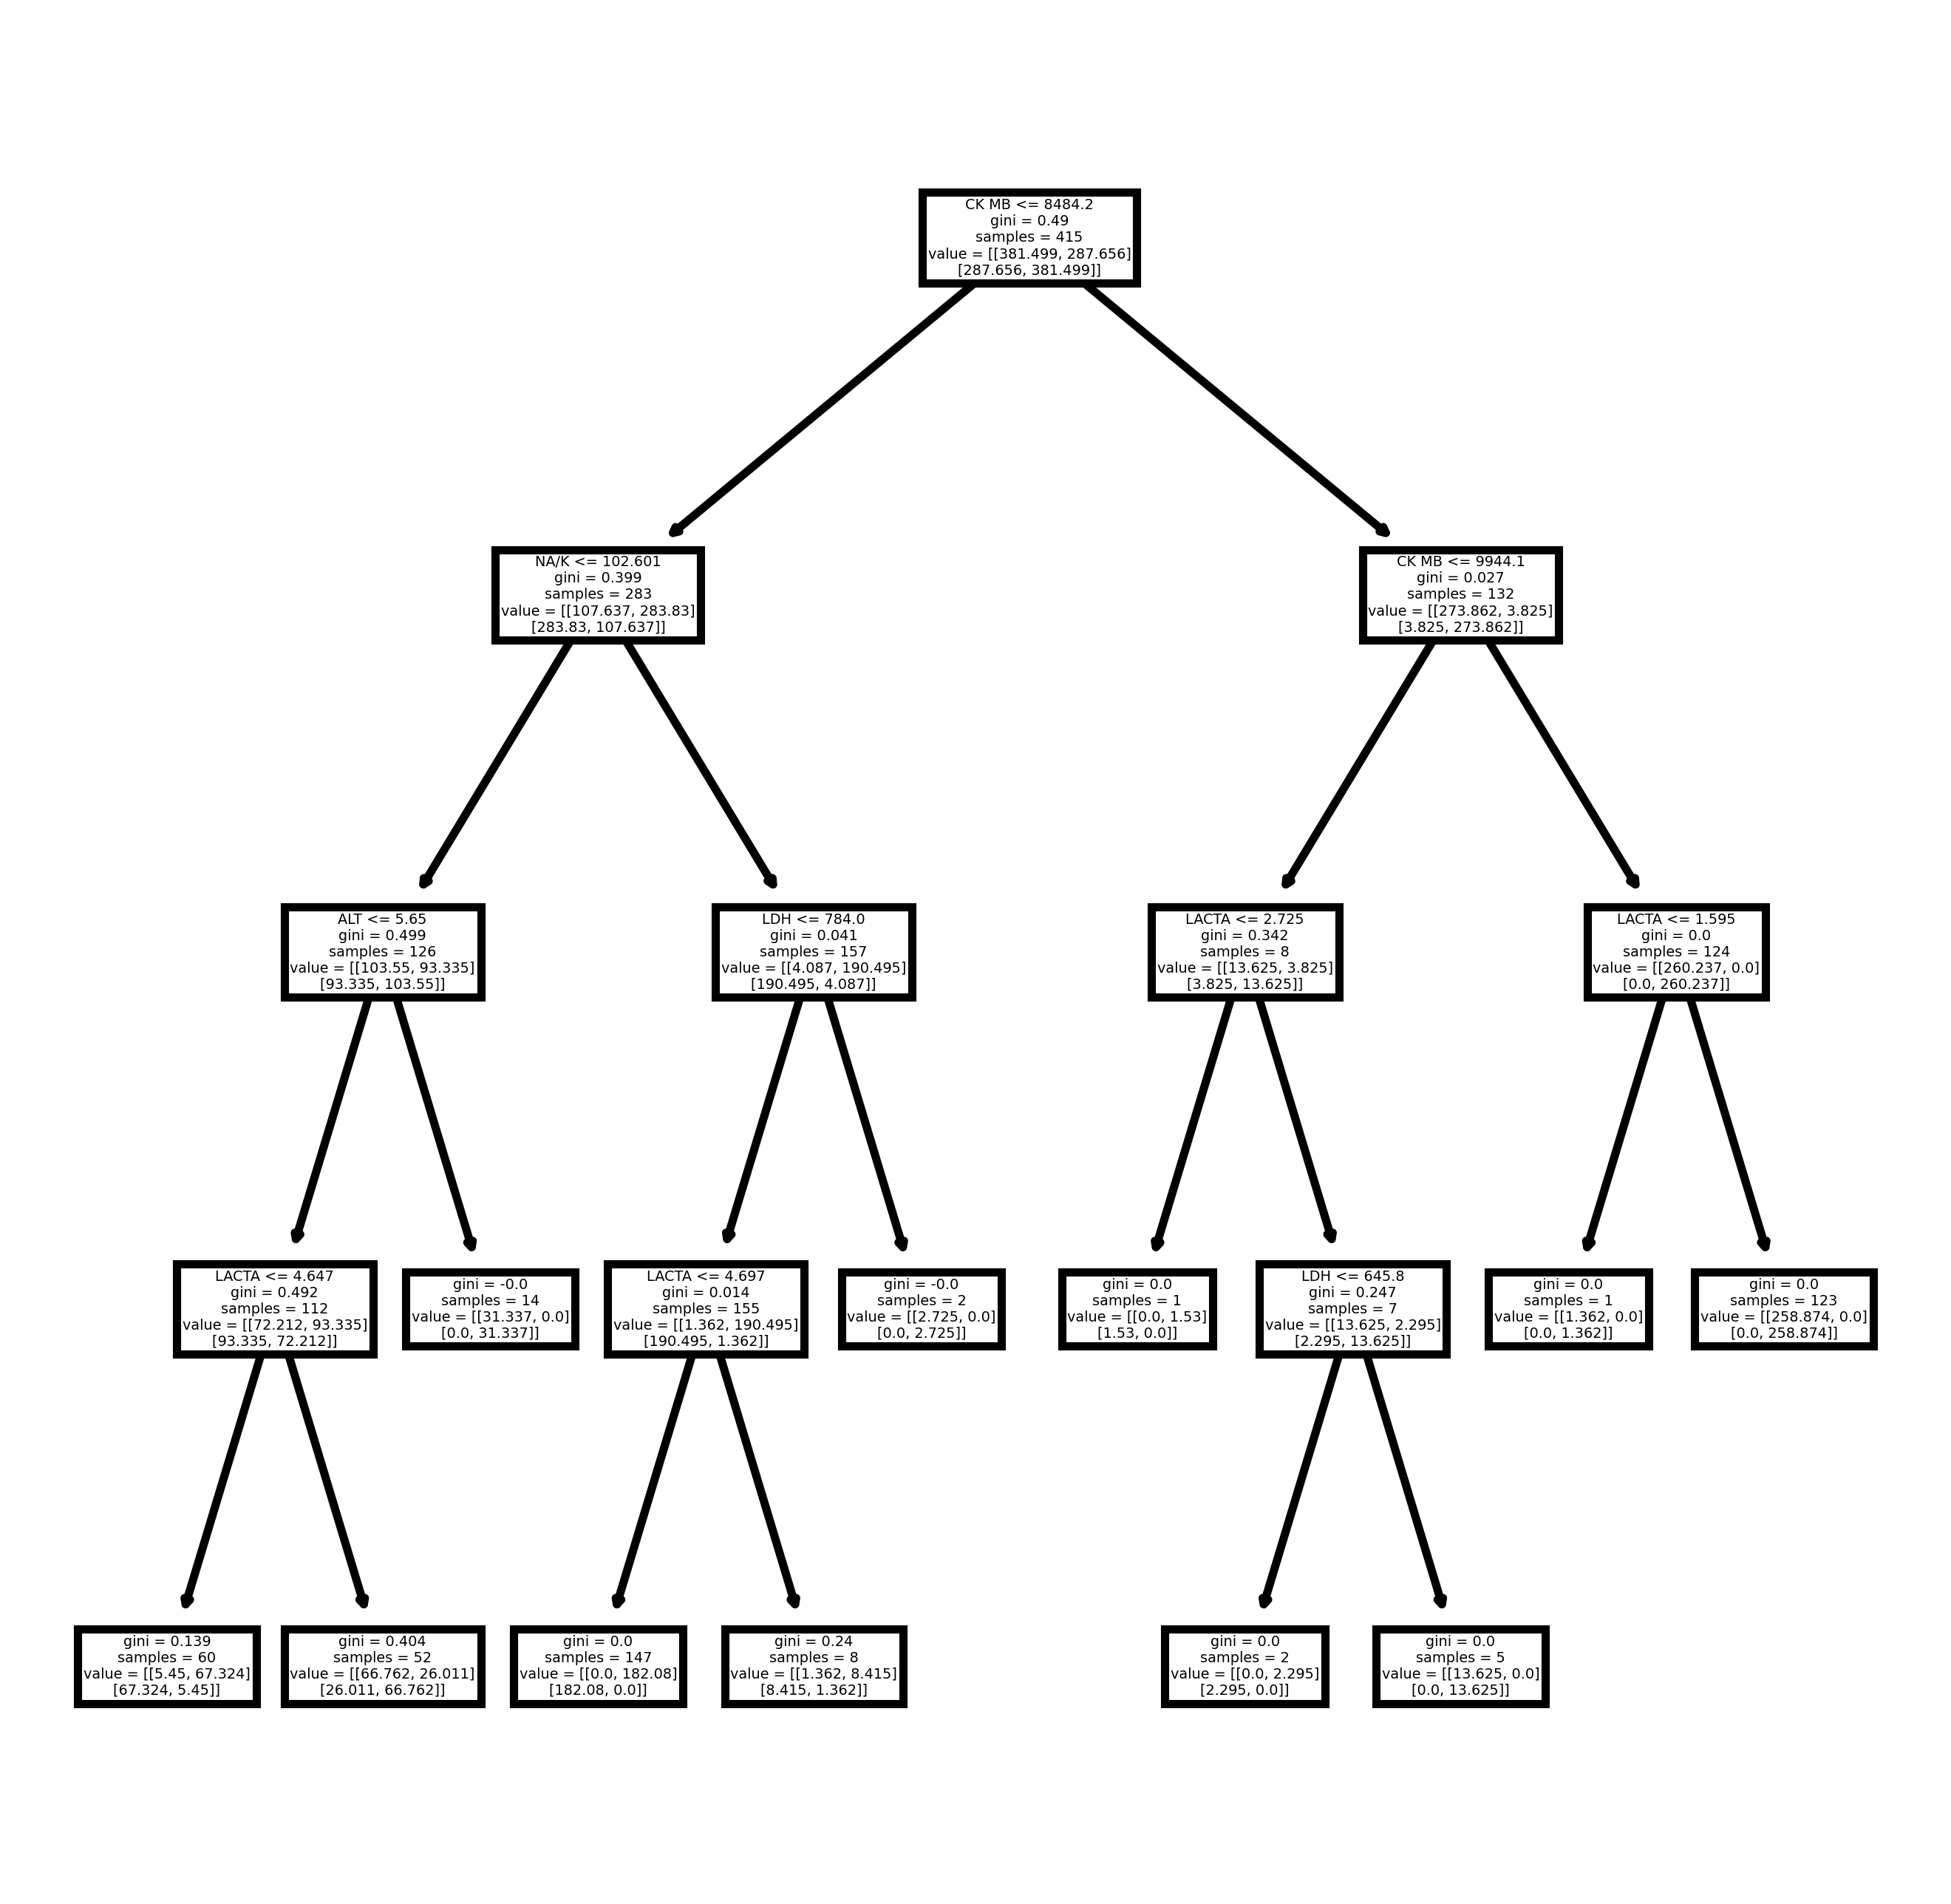

In [75]:

fn=X_train.columns
cn=['Healthy', 'Unhealthy']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
plot_tree(rf.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = False);
fig.savefig('rf_individualtree.png')

# Confusion Matrix and Accuracy Score

In [11]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
accuracy_score(y_test, y_pred_test)

# View the classification report for test data and predictions
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       375
           1       0.97      0.97      0.97       281

   micro avg       0.98      0.98      0.98       656
   macro avg       0.98      0.98      0.98       656
weighted avg       0.98      0.98      0.98       656
 samples avg       0.98      0.98      0.98       656



In [12]:
# Precision
precision_score(y_test, y_pred_test, average=None)[1]

0.975

# Explain Models Decision Making: Summary plots and combined force plots

In [13]:
import shap
shap.initjs()

Wall time: 0 ns


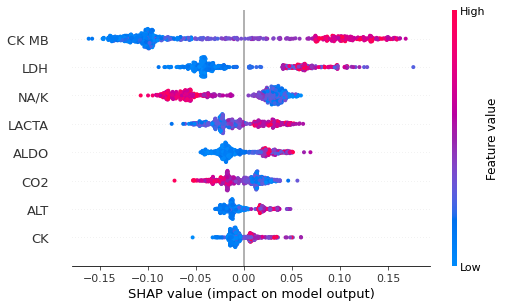

In [14]:
%time
samples = X_train

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(samples, approximate=False, check_additivity=False)

shap.summary_plot(shap_values[0], samples)

In [29]:
shap.force_plot(explainer.expected_value[0], shap_values[0])

In [101]:
# samples = X_train

# shap.summary_plot(shap_values[0], samples)

# Waterfall Plots for Global Feature Importance

In [15]:
def make_shap_waterfall_plot(shap_values, features, num_display=20):
    
    '''
    A function for building a SHAP waterfall plot.
    
    SHAP waterfall plot is used to visualize the most important features in a descending order.
    
    Parameters:
    shap_values (list): SHAP values obtained from a model
    features (pandas DataFrame): a list of features used in a model
    num_display(int): number of features to display
    
    Returns:
    matplotlib.pyplot plot: SHAP waterfall plot
    
    '''
    
    column_list = features.columns
    feature_ratio = (np.abs(shap_values).sum(0) / np.abs(shap_values).sum()) * 100
    column_list = column_list[np.argsort(feature_ratio)[::-1]]
    feature_ratio_order = np.sort(feature_ratio)[::-1]
    cum_sum = np.cumsum(feature_ratio_order)
    column_list = column_list[:num_display]
    feature_ratio_order = feature_ratio_order[:num_display]
    cum_sum = cum_sum[:num_display]
    
    num_height = 0
    if (num_display >= 20) & (len(column_list) >= 20):
        num_height = (len(column_list) - 20) * 0.4
        
    fig, ax1 = plt.subplots(figsize=(8, 8 + num_height))
    ax1.plot(cum_sum[::-1], column_list[::-1], c='blue', marker='o')
    ax2 = ax1.twiny()
    ax2.barh(column_list[::-1], feature_ratio_order[::-1], alpha=0.6)
    
    ax1.grid(True)
    ax2.grid(False)
    ax1.set_xticks(np.arange(0, round(cum_sum.max(), -1)+1, 10))
    ax2.set_xticks(np.arange(0, round(feature_ratio_order.max(), -1)+1, 10))
    ax1.set_xlabel('Cumulative Ratio')
    ax2.set_xlabel('Composition Ratio')
    ax1.tick_params(axis="y", labelsize=13)
    plt.ylim(-1, len(column_list))

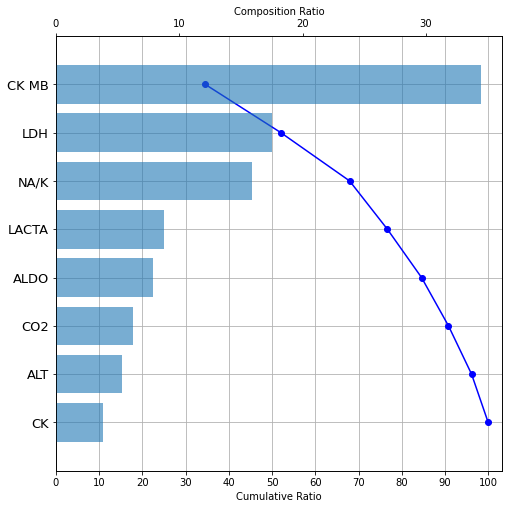

In [99]:
make_shap_waterfall_plot(shap_values[0], samples)

In [16]:
# Let's have a look on the top features and their dependence plots
top_features1 = ['CK MB', 'LDH', 'NA/K', 'CK']
top_features2  = ['CK','ALT', 'CO2']

# Dependence plot

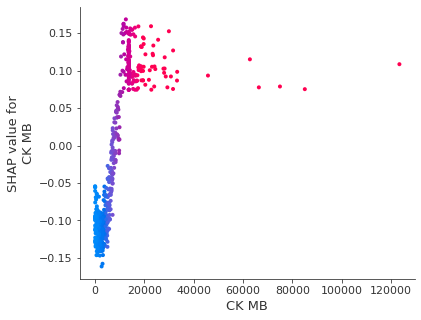

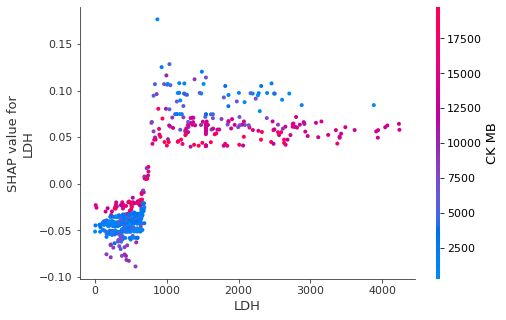

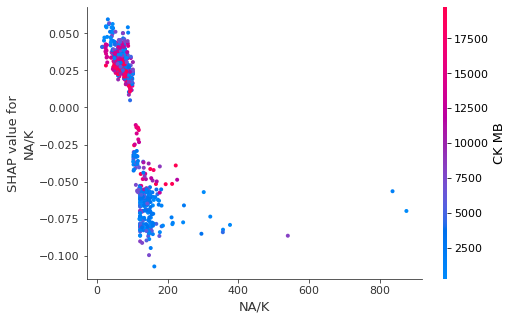

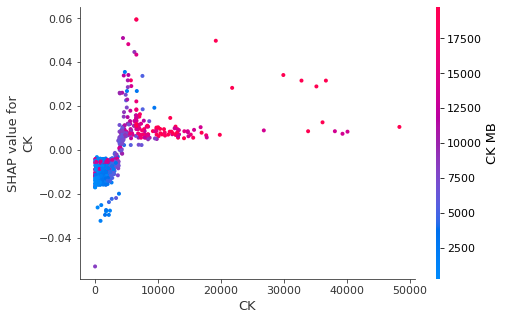

In [17]:
for feature in top_features1:
    shap.dependence_plot(feature, shap_values[0], samples, interaction_index='CK MB')

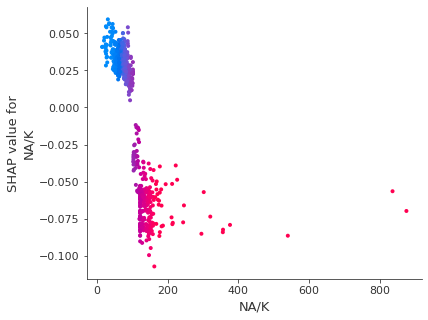

In [107]:

shap.dependence_plot('NA/K', shap_values[0], samples, interaction_index='NA/K')